# Отчет анализа стоимости ювелирных изделий у МЮЗ, дата парсинга -  14 апреля 2022

##  Парсинг 
 С сайта https://miuz.ru были спарсены данные ювелирных издели предлагаемых на интернет магазине с фильтром - кольца - основной камнень бриллиант
https://miuz.ru/catalog/rings/filter/stones_main-is-brilliant/ 
Процесс парсинга, реализован в файле ParsingMiuz.ipynb, процесс очистки и расчет прейскуратной стоимости
бриллиантов в файле for_parsing_func.ipynb

Всего колец с фильтром бриллиант на сайте более 4431 изделий, часть данных было отброшено по причинам:
- если изделие содержало другие камни или жемчуг кроме бриллианта
- изделие не могло правильно считаться парсером
- характеристики бриллиантов содержало ошибки
- были использованы фантазийные по цвету бриллианты (возможно синтетика)

В результате получен датасет с ювелирными изделиями со следующими данными (параметрами):
- Наименование(кольца только с бриллиантами  в количестве 1980 изделий), 
- Артикул,
- Ссылка на карточку с изделием (кликабельная ссылка)
- Стоимость изделия в рублях с учетом скидки (цены от 10 тыс.руб до 981 тыс.руб, на общую сумму 223,3 млн рублей, средняя стоимость 113 тыс.руб),
- масса изделия в граммах (от 0,86 до 20 грамм, общая масса 5703 грамма средний вес 2,88 грамма),
- проба золота (585 проба - 1807 шт, 750 - 140 шт, 375 - 33 шт),
- штук бриллиантов (всего 52748 штук, в среднем на изделие 26 бриллиантов)
- карат бриллиантов (всего 639 карат средняя масса камня 0,012 карат)
- прейскурантная стоимость бриллиантов в долларах (всего 289 тыс долларов, со средней прейскурантной стоимостью 452 доллара за карат)
Датасет приведен в файле 'jewels/muiz04-2022/_брилл_суммированы_mius140422_0-4431.xlsx'


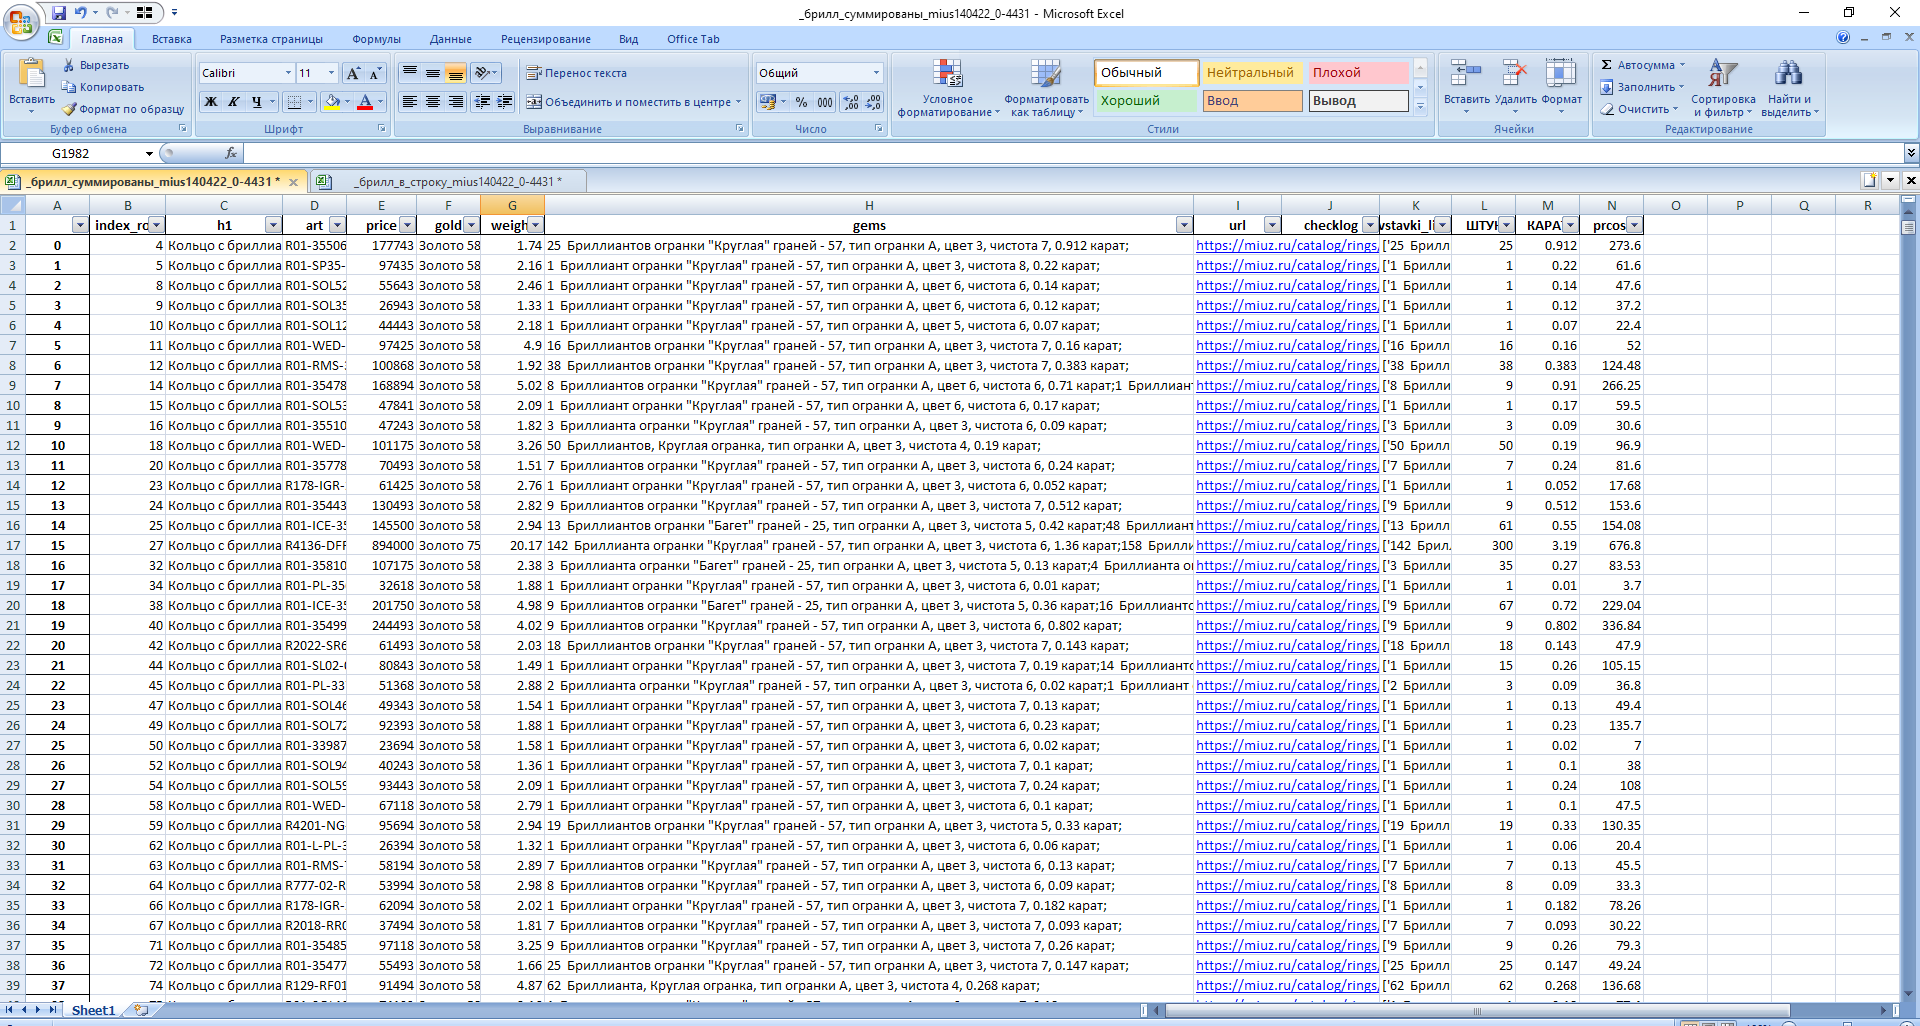

##  Анализ датасета МЮЗ, визуализация, определение коэфициентов
###  Считывание данных с файла
Для этого устанавливаем необходимые модули.
 - загружаем данные с файла 
 #- откыдываем изделия дороже 500т руб, 
 - оставляем изделия пробы 585,
 #- отбрасываем изделия с бриллиантами по прейскуранту свыше 3000 долларов
 - оставлены поля price : цена изделя, weight: масса изделия в граммах, prcost: прейскурант в долларах

In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
filenamemiuz = 'jewels/muiz04-2022/_брилл_суммированы_mius140422_0-4431.xlsx'#'jewels/miuz/_брилл_суммированы_mius161121_0-3178.xlsx'

In [2]:
filenamemiuz

'jewels/muiz04-2022/_брилл_суммированы_mius140422_0-4431.xlsx'

In [3]:
raw = pd.read_excel(filenamemiuz,sheet_name=0)

In [8]:
raw

,Unnamed: 0,index_row,h1,art,price,gold,weight,gems,url,checklog,...,5015.06,5.13,5.44,-1152,Цена с сайта,цена усредненными расчитанными коэфф,Unnamed: 21,за гр золота 585 пробы без учета брилл без ндс,Unnamed: 23,Unnamed: 24
0,0.0,4.0,Кольцо c бриллиантами R01-35506,R01-35506,177743.0,Золото 585,1.74,"25 Бриллиантов огранки ""Круглая"" граней - 57,...",https://miuz.ru/catalog/rings/R01-35506/,NaN,...,5015.06,5.13,5.44,-1152.0,177743.0,144418.486812,0.812513,12434.84127,4.275,4.533333
1,1.0,5.0,Кольцо c бриллиантом R01-SP35-020,R01-SP35-020,97435.0,Золото 585,2.16,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SP35-020/,NaN,...,5015.06,5.13,5.44,-1152.0,97435.0,58008.066012,0.595351,12434.84127,NaN,NaN
2,2.0,8.0,Кольцо c бриллиантом R01-SOL52-015-G3,R01-SOL52-015-G3,55643.0,Золото 585,2.46,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL52-015-G3/,NaN,...,5015.06,5.13,5.44,-1152.0,55643.0,56364.391269,1.012965,12434.84127,NaN,NaN
3,3.0,9.0,Кольцо c бриллиантом R01-SOL35-010-G3,R01-SOL35-010-G3,26943.0,Золото 585,1.33,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL35-010-G3/,NaN,...,5015.06,5.13,5.44,-1152.0,26943.0,34956.299147,1.297417,12434.84127,NaN,NaN
4,4.0,10.0,Кольцо c бриллиантом R01-SOL124-007-G2,R01-SOL124-007-G2,44443.0,Золото 585,2.18,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL124-007-G2/,NaN,...,5015.06,5.13,5.44,-1152.0,44443.0,41169.892922,0.926353,12434.84127,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1978.0,4429.0,Кольцо c бриллиантами R4150-D-LRL151006,R4150-D-LRL151006,43494.0,Золото 585,2.43,"38 Бриллиантов огранки ""Круглая"" граней - 57,...",https://miuz.ru/catalog/rings/R4150-D-LRL151006/,NaN,...,5015.06,5.13,5.44,-1152.0,43494.0,53730.944983,1.235365,12434.84127,NaN,NaN
1979,1979.0,4430.0,Кольцо c бриллиантом R01-SOL171-025-G3,R01-SOL171-025-G3,83293.0,Золото 585,2.45,"1 Бриллиант огранки ""Круглая"" граней - 57, ти...",https://miuz.ru/catalog/rings/R01-SOL171-025-G3/,NaN,...,5015.06,5.13,5.44,-1152.0,83293.0,64914.625334,0.779353,12434.84127,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.027000,0.00000,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
raw = raw.dropna(subset=["art"])

In [14]:
data = raw.loc[(raw.gold.str.contains('585') ),['price','weight','prcost']].loc[(raw.price<500000),:].loc[(raw.prcost<3000),:]
data.head()

,price,weight,prcost
0,177743.0,1.74,273.6
1,97435.0,2.16,61.6
2,55643.0,2.46,47.6
3,26943.0,1.33,37.2
4,44443.0,2.18,22.4


In [15]:
print(f'''После урезания получен датасет с {len(data)} данными 
общая масса изделий {round(data.sum()['weight']/1000,2)} кг на сумму {round(data.sum()['price']/1000000)} млн рублей 
с прейскурантной стоимостью  {round(data.sum()['prcost']/1000)}  тыс долл''') 

После урезания получен датасет с 1780 данными 
общая масса изделий 4.73 кг на сумму 149 млн рублей 
с прейскурантной стоимостью  182  тыс долл


In [16]:
#сумма датасета
data.describe()

,price,weight,prcost
count,1780.000000,1780.000000,1780.000000
mean,83594.206742,2.658871,102.452084
std,71931.267331,1.123906,141.093749
min,14694.000000,0.890000,1.600000
25%,42294.000000,1.910000,32.190000
50%,62094.000000,2.380000,59.905000
75%,94268.750000,3.140000,111.280000
max,494994.000000,9.500000,1484.000000


###  Визуализиация данных
Построим облако точек в трехмерной плоскости
- х вес золота в граммах
- y стоимость прейскурантная бриллиантов
- z стоимость изделия в тысячах рублей

Если покрутить график, то видно что точки стремятся к плоскости



In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


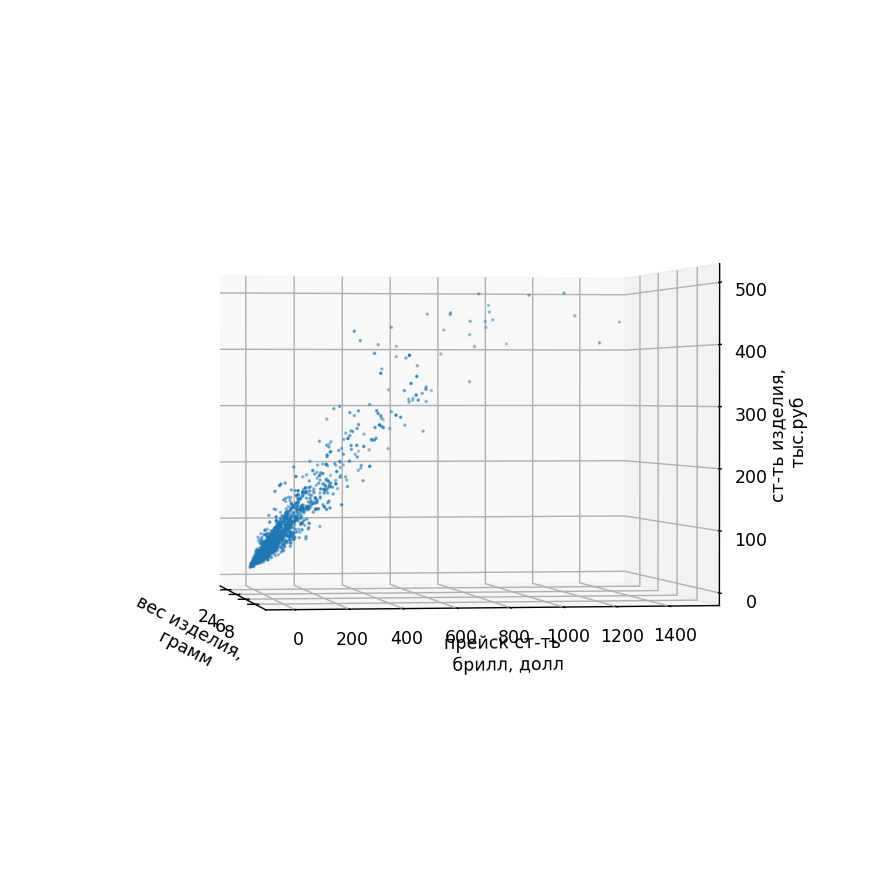

C:\Users\diva0\AppData\Local\Temp/ipykernel_9236/3924619287.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = "3d")


In [24]:
#
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection = "3d")
ax.scatter3D(data.weight,data.prcost,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('вес изделия, \n грамм')
ax.set_ylabel('прейск ст-ть \n брилл, долл')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)
#todo 3 projection need

### Подготовка данных для определения коэффициентов  

Для того чтобы полученные коэффициенты имели интерпретируемый смысл, предлагается прейскурантную стоимость бриллиантов перевести в рубли, граммы золота перевести в биржевую стоимость золота, данного веса изделия в рублях. 

In [19]:
#Курс доллара и биржевая цена золота на 03-12-2021
#dollar_rate = 73.66
#gold_rate = 4191.05
#Курс доллара и биржевая цена золота на 19-04-2022
dollar_rate = 80.36
gold_rate = 5015.06
data['prcost_rub'] = data.prcost*dollar_rate
data['gold_rub'] = data.weight*0.585*gold_rate
pd.options.display.float_format ="{:.2f}".format
data.head()

,price,weight,prcost,prcost_rub,gold_rub
0,177743.00,1.74,273.60,21986.50,5104.83
1,97435.00,2.16,61.60,4950.18,6337.03
2,55643.00,2.46,47.60,3825.14,7217.17
3,26943.00,1.33,37.20,2989.39,3901.97
4,44443.00,2.18,22.40,1800.06,6395.71


<IPython.core.display.Javascript object>


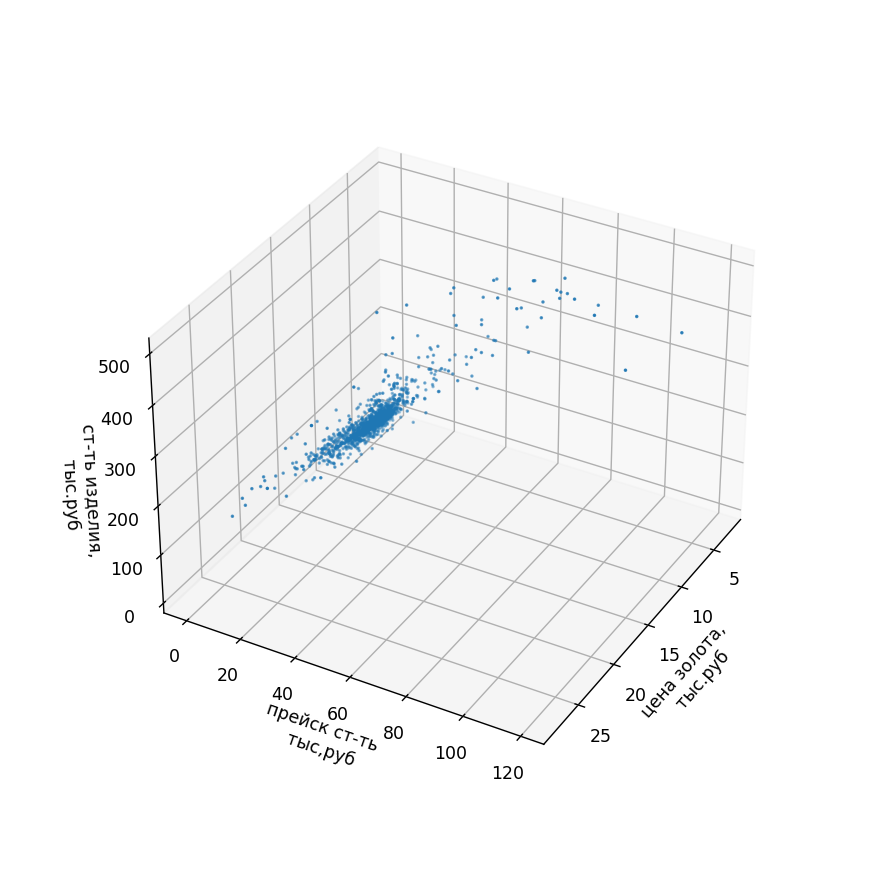

C:\Users\diva0\AppData\Local\Temp/ipykernel_9236/3805733039.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = "3d")


In [20]:
#новое графическое представление будеть иметь вид
fig2 = plt.figure(figsize=(7,7))
ax = plt.gca(projection = "3d")
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='#1f77b4')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(45,0)

Цена ювелирного изделия в первом приближении формируется линейной зависимостью, если обозначить за Z - цену издели, X - масса золота, Y - прейскурнтная стоимость бриллианов то можно записть закономерностю вида:

$$ Z = f(X,Y) = НДС*СКИДКА*НАЦЕНКА*\\(ПРОБА*БИРЖЕВАЯСТОИМОСТ*НАЦЕНКАЗОЛОТА*СЛОЖНОСТЬ*X\\ 
+НАЦЕНКАПРЕЙСКУРАНТ*СЛОЖНОСТЬ*Y+НАЦЕНКАБЕЗДКДМ) $$
можно раскрыть скобки, перемножить множители и мы получим уравнение вида:
$$ Z = A*X+B*Y+C $$
линейное уравнение такого вида в трехмерной плоскости является плоскостью, поэтому необходимо усредненную плоскость и найти эти три коэффициента.

###  Вычисление коэффициентов усредненой по облаку данных плоскости  

Для этого мы устанавливаем модуль отвечающий за расчеты линейной алгебры, и загружаем наши данные для расчета коэффициентов, и получаем коэффициенты



In [21]:
from sklearn import linear_model
#подготовка данных 
miuz = linear_model.LinearRegression()
X_train = data.iloc[:,:].loc[:,['gold_rub','prcost_rub']].to_numpy()
Y_train = data.iloc[:,:].loc[:,'price'].to_numpy()
miuz.fit(X_train,Y_train)
A,B = miuz.coef_
C =  miuz.intercept_
A,B,C

(5.126348226701011, 5.436369408615512, -1152.3962490866688)

### Визуальная проверка полученных коэффициентов

In [22]:
#проверка
data['predict'] = miuz.predict(X_train)
data['bycoef'] = data.gold_rub*miuz.coef_[0] + data.prcost_rub*miuz.coef_[1]+miuz.intercept_
data['diff'] = data.predict-data.bycoef
data.head()

,price,weight,prcost,prcost_rub,gold_rub,predict,bycoef,diff
0,177743.00,1.74,273.60,21986.50,5104.83,144543.45,144543.45,0.00
1,97435.00,2.16,61.60,4950.18,6337.03,58244.41,58244.41,-0.00
2,55643.00,2.46,47.60,3825.14,7217.17,56640.20,56640.20,0.00
3,26943.00,1.33,37.20,2989.39,3901.97,35101.89,35101.89,0.00
4,44443.00,2.18,22.40,1800.06,6395.71,41420.03,41420.03,0.00


Усредненная по нашим данным плоскость и коэффициенты посчитаны модулем по методу наименьних квадратов, постороим на плоскость построенной плоскости для проверки

<IPython.core.display.Javascript object>


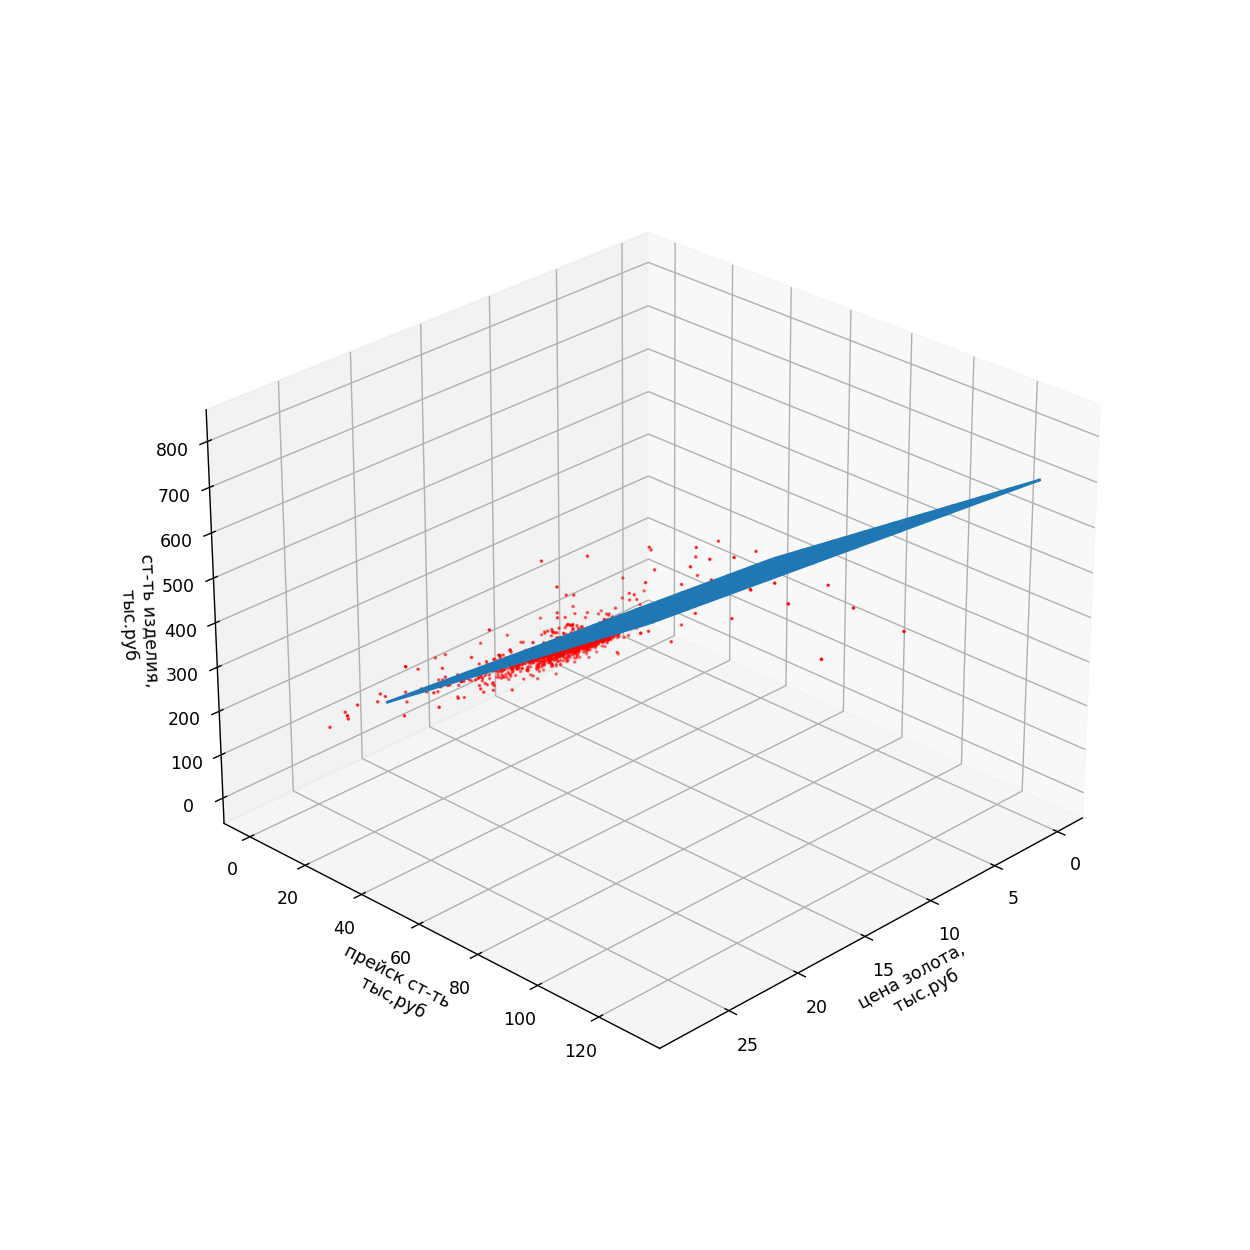

C:\Users\diva0\AppData\Local\Temp/ipykernel_9236/4292733120.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'ст-ть изделия,\n тыс.руб')

In [25]:
x_val = np.linspace(0,20000,10)# np.arange(0, 20000,5000)
y_val = np.linspace(0,130000,10)
xx,yy = np.meshgrid(x_val,y_val)
zz = A*xx + B*yy + C/1000
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.predict/1000,s=1,c='red')
#ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.bycoef/1000,s=1,c='green')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
#ax.plot_surface(xx/1000, yy/1000, zz/1000)

<IPython.core.display.Javascript object>


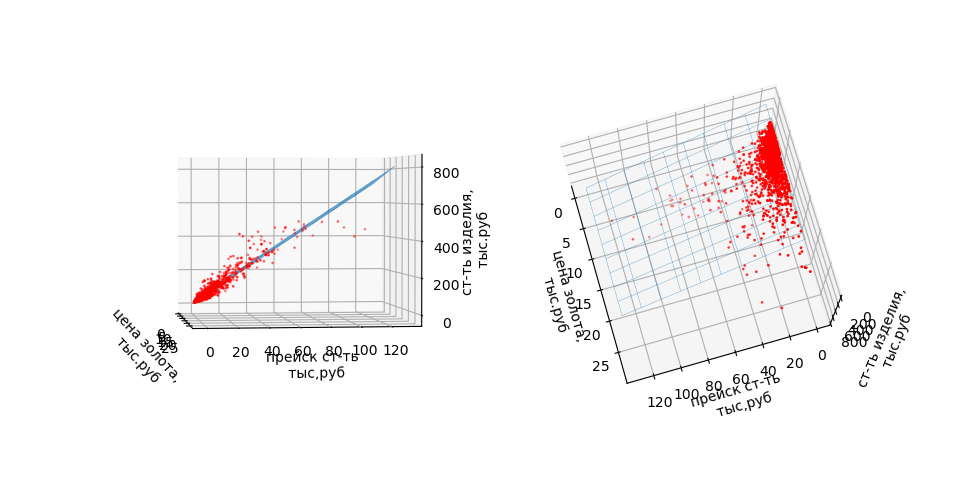

In [40]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-7,4)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-66,-166)


# Выводы 
Реализованная модель анализа цен ювелирных изделий с бриллиантами позволяет получить усредненную информацию по ценообразованию.
В анализируемой партии изделий получены следующие коэффициенты цены изделия  

In [68]:
print(f'''                                            A = {A:2.2f} 
                                            B = {B:2.2f} 
                                            C = {C:2.2f}''')

                                            A = 5.13 
                                            B = 5.44 
                                            C = -1152.40


где 
формула - $$ Z = A*X+B*Y+C $$
Z - стоимость изделия в рублях со всеми накрутками с учетом ндс и скидки
X - биржевая стоимость золота, данного веса изделия в рублях
Y - прейскурантная стоимость бриллиантов в рублях
С - наценка в рублях не зависящая от граммов изделия и вставок

Для сравнения в прошлом анализе, подобной партии МЮЗ в (ноябрь 2021) были получены следующие коэффициенты:

$$А = 3.3$$
$$В = 4.0$$
$$С = 2205$$

